<a id='top'></a>

# Melbourne Housing Complex Problem - Report

Author - **DHRITISHMAN SARMAH**

*Student of Bachelor of Technology*

*4th semester, Electronics and Communication Engineering*

*National Institute of Technology, Silchar*

email: dhritish9man@gmail.com

### Contents:
1. [Acknowledgement](#acknow)
1. [Problem Statement](#problem)
1. [Methodology](#method)
1. [Data Collection](#datacollect)
1. [Data Analysis](#datanal)
    - [Load Data and Modules](#datanal)
    - [Relations between Features](#relation)
    - [Missing Values](#missing)
    - [Derived Features](#derived)
    - [Modelling](#model)
1. [Results](#result)
  - [Solution to Problem 1](#result)
  - [Solution to Problem 2](#result)
  - [Solution to Problem 3](#ans3)
  - [Solution to Problem 4](#ans4)
  - [Solution to Problem 5](#ans4)
1. [Reference](#ref)

<a id='acknow'></a>

## 1.Acknowledgement

The task given to me was indeed a challenging and worth doing project for me. During the course, I had implemented various concepts that I learnt from free online resources on Machine Learning and Python Programming. I have tried my best to make my work as appealling as possible, and I hope my work will meet upto the expectations of the evaluator who shall be evaluating my work

<a id='problem'></a>

## 2.Problem Statement

Melbourne is currently experiencing a housing bubble (some experts say it may burst soon).Housing data of various suburbs are given.

 Some Key Details of dataset
- Suburb: Suburb Area
- Rooms: Number of rooms in the property
- Price: Price in dollars
- Method: S - property sold; SP - property sold prior; PI - property passed in; PN - sold prior not disclosed; SN - sold not disclosed; NB - no bid; VB - vendor bid; W - withdrawn prior to auction; SA - sold after auction; SS - sold after auction price not disclosed. N/A - price or highest bid not available.
- Type: br - bedroom(s); h - house,cottage,villa, semi,terrace; u - unit, duplex; t - townhouse; dev site - development site; o res - other residential.
- SellerG: Real Estate Agent
- Distance: Distance from CBD
- Regionname: General Region (West, North West, North, North east ...etc)
- Propertycount: Number of properties that exist in the suburb.
- Bedroom : # of Bedrooms (from different source)
- Bathroom: Number of Bathrooms
- Car: Number of carspots
- Landsize: Self explanatory
- BuildingArea: Self explanatory
- YearBuilt: Year the house was built
- CouncilArea: Governing council for the area
- Lattitude: Self explanatory
- Longitude: Self explanatory


Questions:

1. Predict the housing price for the test set data.

2. Which suburbs are the best to buy in? ('best' need not be in terms of monetary benefits. You can define your own criteria). Use creative visualisations of different results

3. Using feature selection methods find the features which are most significant to determine the price of a house. Justify your results.

4. Using dimensionality reduction reduce the dimensions to the optimal level and determine where's the expensive side of town?

5. Comment on the kind of housing properties different agents (any 5 agents from SellerG column) are dealing into. Like an agent who deals with only costly houses; or someone dealing with properties mostly in a particular suburb etc. Use supporting graphs and plots.

Submission:

For Q1, submit a CSV file with your predicted value. Remember to keep your respective outputs in the exact same order as it appers in the test set. R2 score shall be used as the evaluation metric.
For Q.2-5, submit them in the form of a report with proper visualization and/or logic as applicable.

<a id ='method'></a>
[go back to top](#top)

## 3.Methodology

For performing the task, collected data was first analysed as follows:
- Finding relations between features to check dependence of input features with output feature.
- Dealing with missing values in data so as reduce further problems because some algorithms used here are not able to handle emplty values.
- Creating new features using one or more old features. This step is also called feature reduction as one might use the new feature instead of the old features used to create it.
- Testing the updated data with various training models, comparing their accuracy and finalizing which model will be used.
- Finally, updating the test dataset with model and submit results.

<a id='datacollect'></a>

## 4.Data Collection

Data for the Melbourne Housing Problem can be downloaded from this [Google drive](https://drive.google.com/open?id=16Q3789aiAhVl9ud_OddXUQjGqBhQYkyu) link. 
It contains three files.
- 'Problem Statement.txt'  (Contains the problem statement)
- 'Melbourne_Housing_train.csv' (Contains data for training)
- 'Melbourne_Housing_Test.csv'  (Contains data for testing and result submition)

<a id='datanal'></a>
[go back to top](#top)

## 5.Data Analysis

### Load Data and Modules

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestRegressor

%matplotlib inline

In [26]:
train = pd.read_csv('Melbourne_Housing_train.csv')
test = pd.read_csv('Melbourne_Housing_Test.csv')
train_m = train.drop(['YearBuilt','BuildingArea'], axis=1)

### Intial Exploration

Let's take a quick overall look at the training set.

In [3]:
train.describe().astype('float32')

,Rooms,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount,Price
count,21797.000000,21796.000000,21796.000000,16635.000000,16631.000000,16337.000000,14374.000000,8566.000000,9673.000000,16784.000000,16784.000000,21794.000000,21797.00
mean,2.991513,11.265769,3113.452148,3.044785,1.592087,1.713044,582.555237,158.593658,1966.698364,-37.806458,144.995789,7553.681152,1048248.00
std,0.954542,6.771013,111.599304,0.957107,0.700258,1.000818,3869.343018,499.190918,36.887856,0.091077,0.121159,4502.461426,638628.25
min,1.000000,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.190430,144.423798,121.000000,85000.00
25%,2.000000,6.400000,3046.000000,2.000000,1.000000,1.000000,217.000000,100.000000,1950.000000,-37.860001,144.923935,4294.000000,636500.00
50%,3.000000,10.500000,3088.000000,3.000000,1.000000,2.000000,510.000000,133.000000,1970.000000,-37.799801,145.002594,6567.000000,870000.00
75%,4.000000,14.000000,3152.000000,4.000000,2.000000,2.000000,662.000000,182.000000,2000.000000,-37.748875,145.067917,10412.000000,1290000.00
max,16.000000,48.099998,3978.000000,20.000000,9.000000,18.000000,433014.000000,44515.000000,2019.000000,-37.397800,145.526352,21650.000000,11200000.00


In [4]:
print(train.isnull().sum())
print(train.info())

Suburb               0
Rooms                0
Type                 0
Method               0
SellerG              0
Distance             1
Postcode             1
Bedroom2          5162
Bathroom          5166
Car               5460
Landsize          7423
BuildingArea     13231
YearBuilt        12124
CouncilArea          3
Lattitude         5013
Longtitude        5013
Regionname           3
Propertycount        3
Price                0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21797 entries, 0 to 21796
Data columns (total 19 columns):
Suburb           21797 non-null object
Rooms            21797 non-null int64
Type             21797 non-null object
Method           21797 non-null object
SellerG          21797 non-null object
Distance         21796 non-null float64
Postcode         21796 non-null float64
Bedroom2         16635 non-null float64
Bathroom         16631 non-null float64
Car              16337 non-null float64
Landsize         14374 non-null float64
Buildin

**We learn :**
- There are 19 columns including *Price* where 6 are categorical features and rest are numeric values
- Features like *Bedroom2*, *Bathroom*, *Car*, *Landsize*, *Lattitude* and *Longtitude* have 23-34% missing values while *BuildingArea* and *YearBuilt* have 55-65% missing data which is a matter of great concern.

<a id='relation'></a>
[go back to top](#top)

### Relation between Features

Let's look at the correlation matrix. It shows pearson's correlation coefficient between numerical features only.

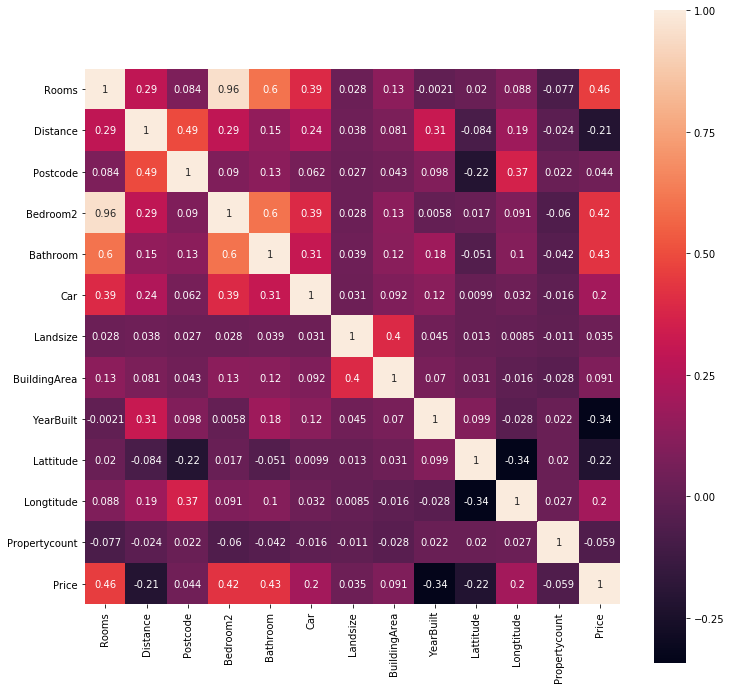

In [5]:
plt.figure(figsize=[12,12])
foo = sbn.heatmap(train.corr(), square=True, annot=True)

**We learn :**
- *Rooms* heavily correlate with *Bedroom2* and *Bathroom*.
- *Landsize* and *BuildingArea* care about themselves only and don't correlate with any other feature.
- *Price* is correlated with *Rooms*, *Distance*, *Yearbuilt*, *Lattitude* and *Longtitude*.

Map of Melbourne can be visualised with given coordinates of the houses. *train_m* set is used which is nothing but *train* with *YearBuilt* and *BuildingArea* dropped as these two features have maximum missing values.

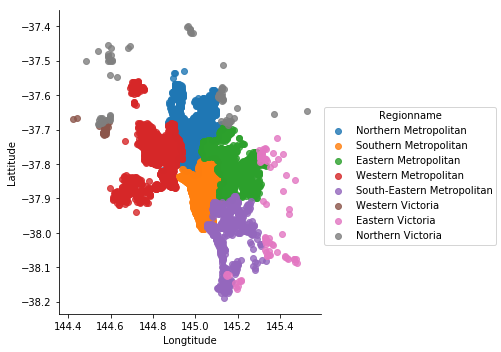

In [6]:
sbn.lmplot(x = 'Longtitude', y='Lattitude', data=train_m.dropna(),
           hue='Regionname', fit_reg=False, legend=True)

Plotting variation of *Distance* on the map.

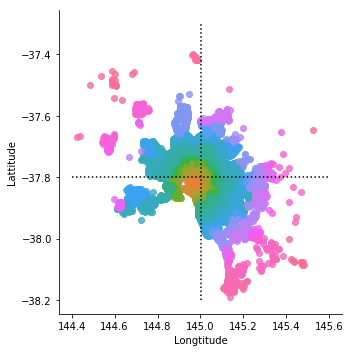

In [7]:
sbn.lmplot(x = 'Longtitude', y='Lattitude', data=train_m.dropna(), hue='Distance', fit_reg=False, legend=False)
plt.hlines([train_m['Lattitude'].median()], xmin=144.4, xmax=145.6, linestyles = 'dotted')
plt.vlines([train_m['Longtitude'].median()], ymin=-38.2, ymax=-37.3, linestyles = 'dotted')

**We learn :** Above plot shows *Distance* which is clearly the distance from centre of Melbourne..

Examining *Type* and *Method* feature on the map.

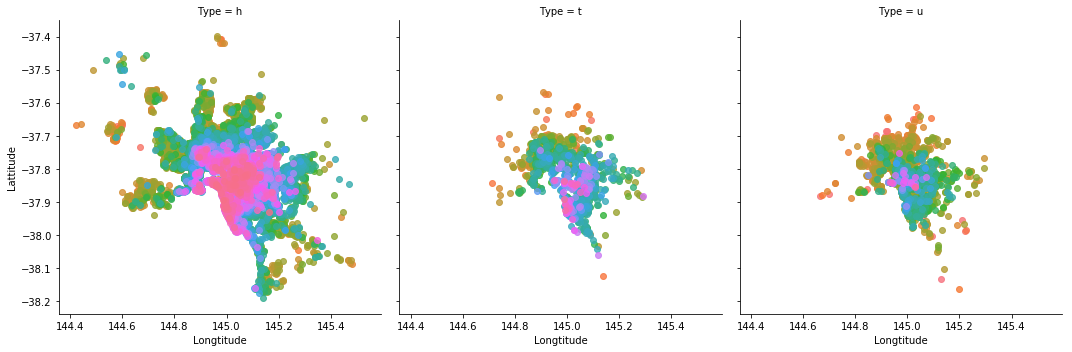

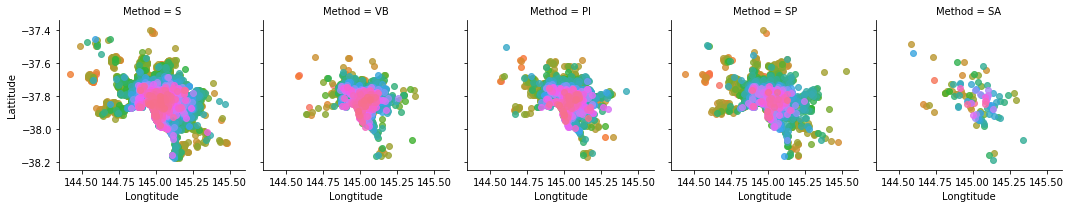

In [8]:
sbn.lmplot(x = 'Longtitude', y='Lattitude', data=train_m.dropna(),col='Type',hue='Price', fit_reg=False, legend=False)
sbn.lmplot(x = 'Longtitude', y='Lattitude', data=train_m.dropna(),col='Method',hue='Price', fit_reg=False, legend=False, size=3)

In [9]:
train.groupby('Type').size()

Type
h    14790
t     2307
u     4700
dtype: int64

**We learn :** Pink value is higher than Orange. Maximum of house types are 'h' which are spread across the 'u' and 't' type is present only in center of Melbourne. 'h' type is costlier than 'u' type. This clearly shows that Houses at the center of Melbourne are costlier than those on the outskirts.

Examining *Method*, *Rooms*, *Bedroom2*, *Bathroom*, *Car* and *Type*  with *Price*.

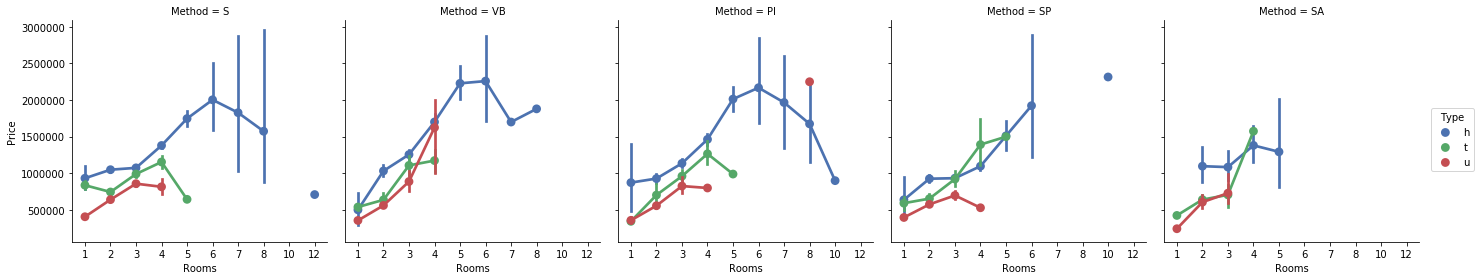

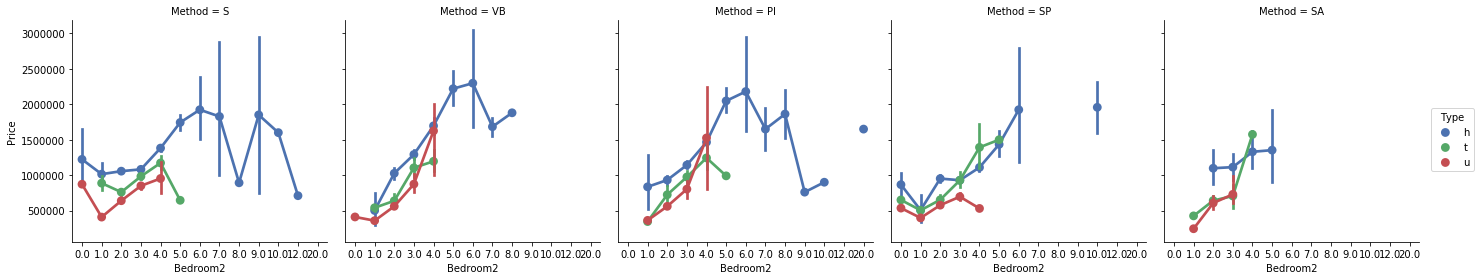

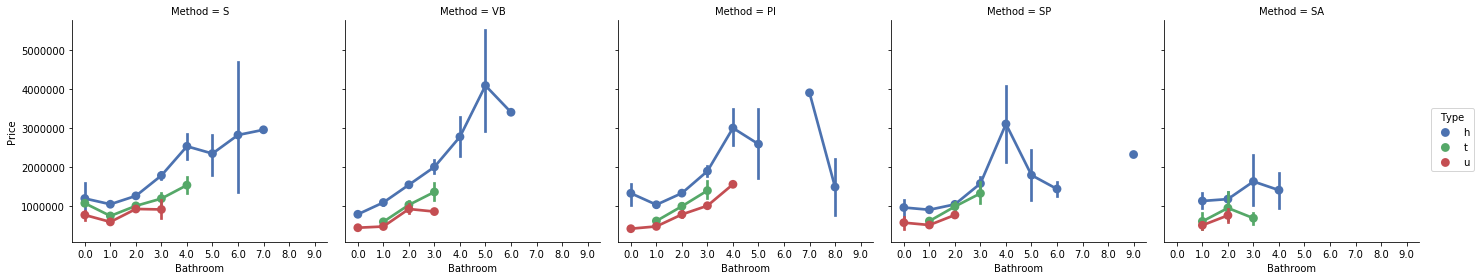

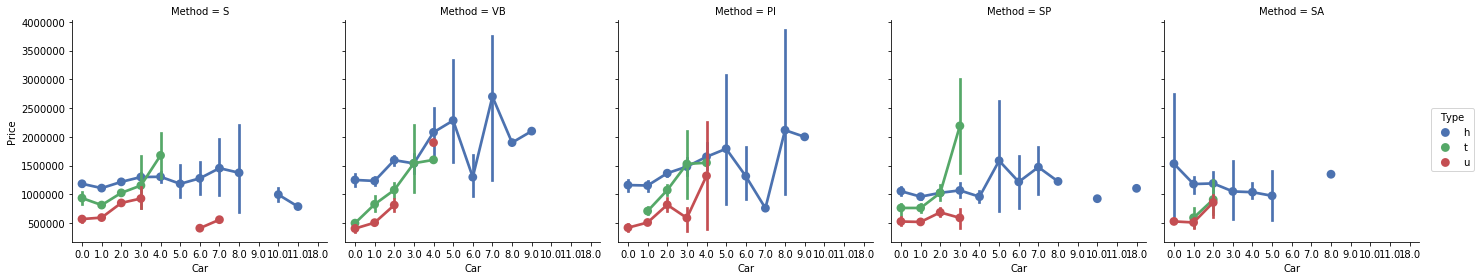

In [10]:
sbn.factorplot(x='Rooms',y='Price',hue='Type',col='Method',data=train_m.dropna(), palette='deep')
sbn.factorplot(x='Bedroom2',y='Price',hue='Type',col='Method',data=train_m.dropna(), palette='deep')
sbn.factorplot(x='Bathroom',y='Price',hue='Type',col='Method',data=train_m.dropna(), palette='deep')
sbn.factorplot(x='Car',y='Price',hue='Type',col='Method',data=train_m.dropna(), palette='deep')

**We learn :** Type 'h' has higher number of *Rooms*, *Bedrooms*, *Bathroom* and *Car* as well high *Price* while type 'u' and 't' are pretty much below 'h' in room number as well as cost. *Rooms*, *Bedroom2* and *Bathroom* feature show similar traits.

Examining *Regionname* and *Type* with *Price*.

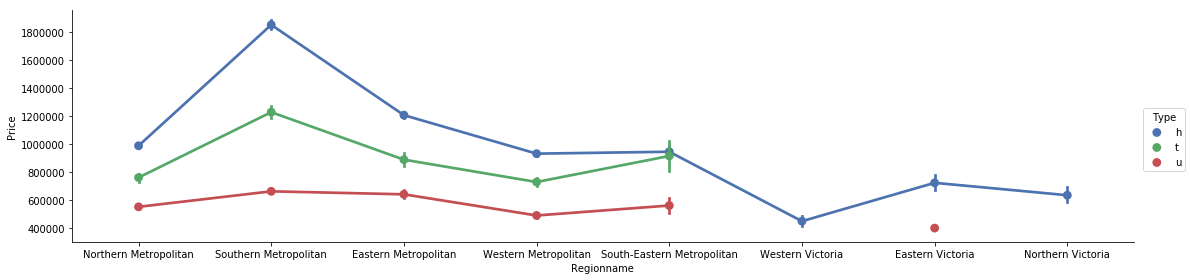

In [11]:
sbn.factorplot(x='Regionname',y='Price',hue='Type',data=train_m.dropna(), palette='deep', size=4,aspect=4)

**We learn :** Southern Metropolitan has the Costliest Houses while Western Victoria has lowest price rating.

Examining *Yearbuilt* and *BuildingArea* with *Rooms* and *Type*.

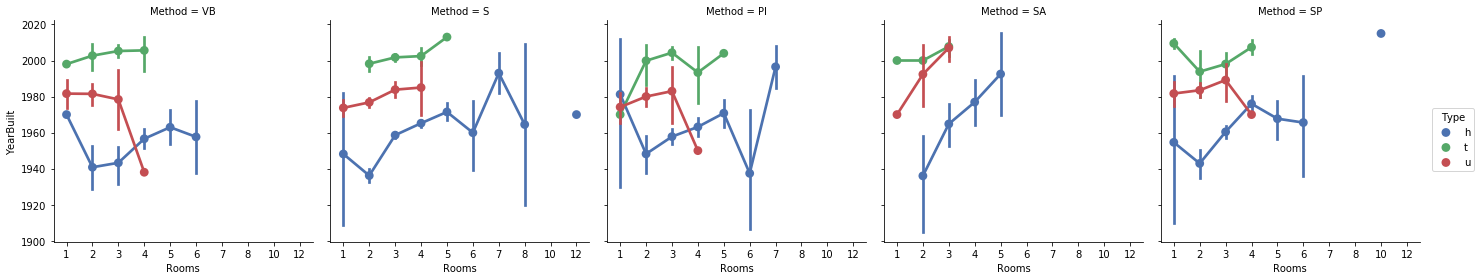

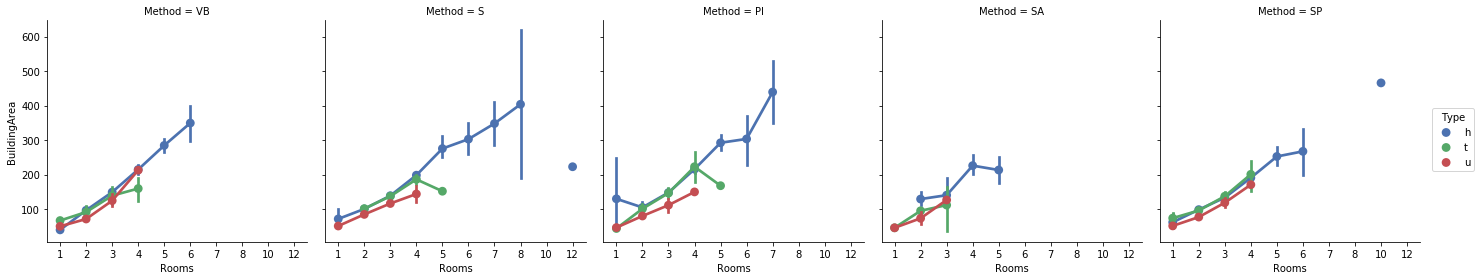

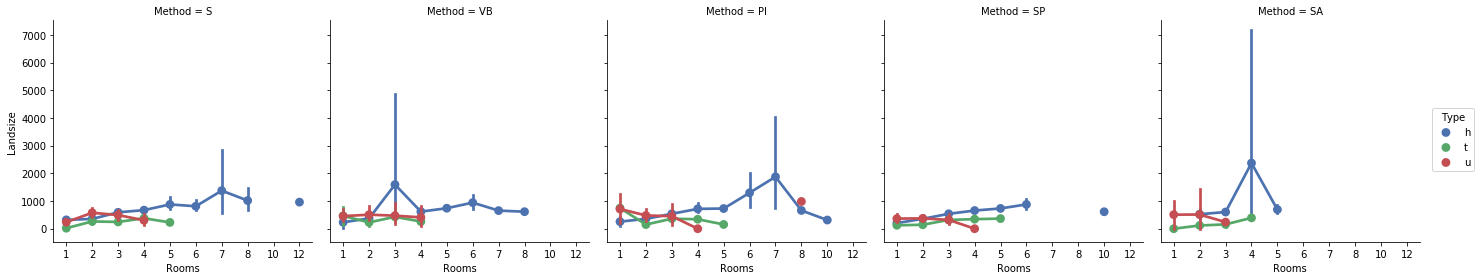

In [12]:
sbn.factorplot(x='Rooms',y='YearBuilt',hue='Type',col ='Method',data=train.dropna(), palette='deep')
sbn.factorplot(x='Rooms',y='BuildingArea',hue='Type',col ='Method',data=train.dropna(), palette='deep')
sbn.factorplot(x='Rooms',y='Landsize',hue='Type',col ='Method',data=train_m.dropna(), palette='deep')

**We learn :** Type 't' houses are latest while type 'h' old. This can be realised as new houses are being made in center with small area and less rooms while houses made before 2000 were made in the outskirts of present city with large area and more rooms.

We will further Check relations with new derived features in the below sections.

<a id = 'missing'></a>
[go back to top](#top)

### Missing Values

First we deal with *Distance*, *Postcode*, *CouncilArea*, *Regionname* and *Propertycount* which have very small missing values.

In [13]:
train[train['CouncilArea'].isnull()]

,Suburb,Rooms,Type,Method,SellerG,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Price
7153,Camberwell,2,h,VB,Jellis,7.7,3124.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,825000
13381,Fawkner Lot,3,h,SP,Brad,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,616000
16141,Footscray,2,u,S,Jas,5.1,3011.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,710000


These three inputs are responsible for the missing values of the above mentioned 5 features. They have more than 60% value missing. Dropping them would be wise in this situation.

In [27]:
train = train.drop([7153,16141,13381])

Examining missing values in testset.

In [15]:
print(test.isnull().sum())

Suburb              0
Rooms               0
Type                0
Method              0
SellerG             0
Distance            0
Postcode            0
Bedroom2         1279
Bathroom         1281
Car              1364
Landsize         1842
BuildingArea     3360
YearBuilt        3039
CouncilArea         0
Lattitude        1241
Longtitude       1241
Regionname          0
Propertycount       0
dtype: int64


In [28]:
combine = pd.concat([train.drop(['Price'],axis=1),test])
price = train['Price']

combine['Bedroom2'] = combine['Bedroom2'].fillna(combine['Rooms'])
combine['Bathroom'] = combine['Bathroom'].fillna(combine['Rooms'])
combine['Car'] = combine['Car'].fillna(combine['Rooms'])
combine['Lattitude'] = combine.groupby(['CouncilArea','Regionname'])['Lattitude'].transform(lambda x: x.fillna(x.median()))
combine['Longtitude'] = combine.groupby(['CouncilArea','Regionname'])['Longtitude'].transform(lambda x: x.fillna(x.median()))

test = combine.iloc[len(train):]
train = combine.iloc[:len(train)]
train['Price'] = price

Rest of the missing values in both trainset and testset are very large in number, so it will be meaningless to fill them up. Instead we derive new features and use them instead.

<a id='derived'></a>
[go back to top](#top)

### Derived Features

Idea of feature engineering is to create new features using old ones which has higher relavance to *Price*. We will use combined set of train and test to create new features. All of them are written in one place and an explanation for each will be provided below.

In [5]:
combine = pd.concat([train.drop(['Price'],axis=1),test])
price = train['Price']

combine['Rooms_eff'] = (combine['Rooms']+combine['Bedroom2']+combine['Bathroom']+combine['Car'])/4.
latt_med,long_med = combine['Lattitude'].median(),combine['Longtitude'].median()
combine['Latt_abs'] = np.abs(combine['Lattitude']*1000 - latt_med*1000)
combine['Long_abs'] = np.abs(combine['Longtitude']*1000 - long_med*1000)


In [30]:
combine['Type'] = combine['Type'].astype('category')
combine['Regionname'] = combine['Regionname'].astype('category')
combine['Method'] = combine['Method'].astype('category')

combine['Type'].cat.categories = [2,1,0]
combine['Regionname'].cat.categories = [6,2,4,1,5,7,3,0]
combine['Method'].cat.categories = [3,2,1,0,4]

combine['Type'] = combine['Type'].astype(int)
combine['Regionname'] = combine['Regionname'].astype(int)
combine['Method'] = combine['Method'].astype(int)

combine['SellerG'] = combine['SellerG'].astype('category')
combine['SellerG'].cat.categories = list(range(1,combine['SellerG'].nunique()+1))
combine['SellerG'] = combine['SellerG'].astype('int32')

combine['Suburb'] = combine['Suburb'].astype('category')
combine['Suburb'].cat.categories = list(range(1,combine['Suburb'].nunique()+1))
combine['Suburb'] = combine['Suburb'].astype('int32')

combine['CouncilArea'] = combine['CouncilArea'].astype('category')
combine['CouncilArea'].cat.categories = list(range(1,combine['CouncilArea'].nunique()+1))
combine['CouncilArea'] = combine['CouncilArea'].astype('int32')

In [31]:
combine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27244 entries, 0 to 5449
Data columns (total 18 columns):
Suburb           27244 non-null int32
Rooms            27244 non-null int64
Type             27244 non-null int32
Method           27244 non-null int32
SellerG          27244 non-null int32
Distance         27244 non-null float64
Postcode         27244 non-null float64
Bedroom2         27244 non-null float64
Bathroom         27244 non-null float64
Car              27244 non-null float64
Landsize         17982 non-null float64
BuildingArea     10656 non-null float64
YearBuilt        12084 non-null float64
CouncilArea      27244 non-null int32
Lattitude        27244 non-null float64
Longtitude       27244 non-null float64
Regionname       27244 non-null int32
Propertycount    27244 non-null float64
dtypes: float64(11), int32(6), int64(1)
memory usage: 3.3 MB


In [32]:
test = combine.iloc[len(train):]
train = combine.iloc[:len(train)]
train['Price'] = price

In [33]:
train = train.drop(['BuildingArea','YearBuilt','Landsize'], axis=1)
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21794 entries, 0 to 21796
Data columns (total 16 columns):
Suburb           21794 non-null int32
Rooms            21794 non-null int64
Type             21794 non-null int32
Method           21794 non-null int32
SellerG          21794 non-null int32
Distance         21794 non-null float64
Postcode         21794 non-null float64
Bedroom2         21794 non-null float64
Bathroom         21794 non-null float64
Car              21794 non-null float64
CouncilArea      21794 non-null int32
Lattitude        21794 non-null float64
Longtitude       21794 non-null float64
Regionname       21794 non-null int32
Propertycount    21794 non-null float64
Price            21794 non-null int64
dtypes: float64(8), int32(6), int64(2)
memory usage: 2.3 MB


We are also label Encoding *Type*, *Regionname* and *Method* with accordance to ascending Price which was visualised in previous sections.

**Discussing about derived features**

- *Rooms_eff :*  Rooms, Bedroom2, and similar features are heavily corelated so average of their values is taken.
- *Latt_abs and Long_abs :* Price is higher at center, lower at outskirts. These features represents distance from center in terms on lattitude and longtitude.
- *Property_eff and Postcode_eff :* They are just feature scaling to smaller values.

Let's visualise correlation matrix of these new features with old ones.

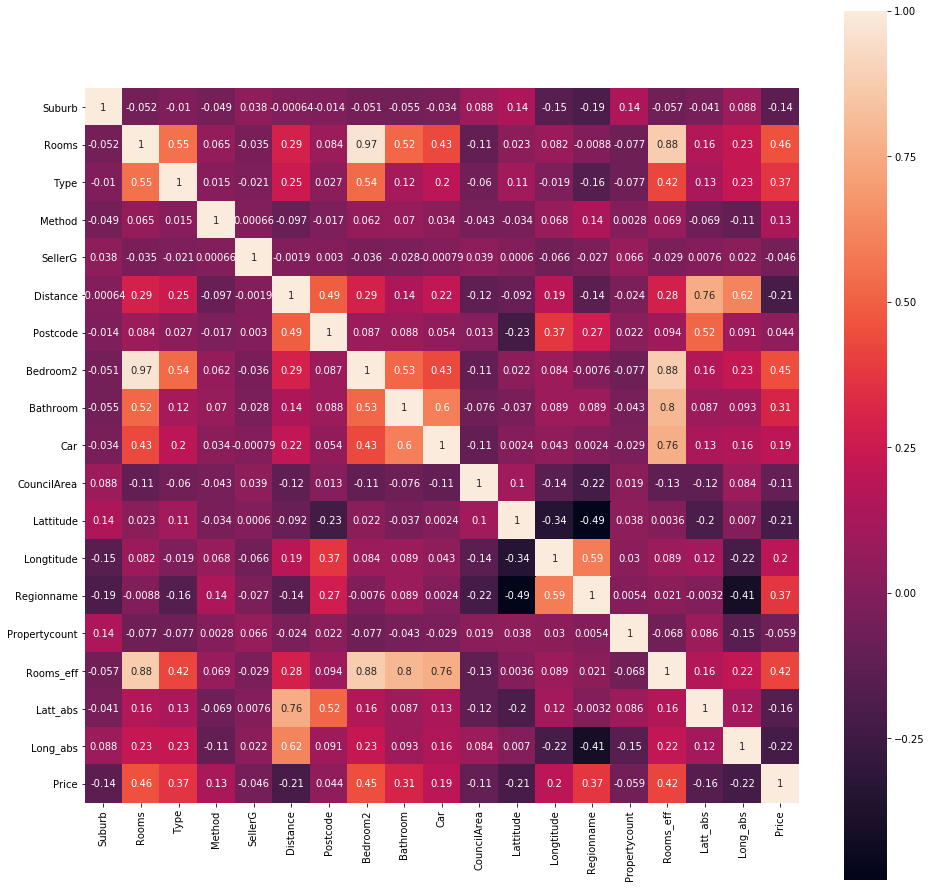

In [33]:
plt.figure(figsize=[16,16])
foo = sbn.heatmap(train.corr(), square=True, annot=True)

<a id='model'></a>
[go back to top](#top)

### Modeling

Overall Summary

- *Type*, *Rooms_eff* and *Regionname* are the main factors
- *Method*, *Distance*, *Lattitude*, *Longtitude* are considerable factors.

**Splitting into trainset and testset**

In [34]:
X = train.drop(['Rooms','Bedroom2','Bathroom','Car'],axis=1).dropna().iloc[:,:-1].values
y = train.drop(['Rooms','Bedroom2','Bathroom','Car'],axis=1).dropna().iloc[:,-1].values
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=0)

##### Run and test on Random Forest Regressor

In [35]:
reg_rfr = RandomForestRegressor()
reg_rfr = reg_rfr.fit(X_train,y_train)

y_pred = reg_rfr.predict(X_test)
print(reg_rfr.score(X_train,y_train))

0.9131479711394064


<a id='result'></a>
[go back to top](#top)

## Results and Answers to questions

### Question 1

This time we train the complete actual training set and submit result in the form of a csv file.

In [20]:
X_T.shape

(5450, 14)

In [22]:
X.shape

(21743, 14)

In [36]:
X_T = test[train.drop(['Rooms','Bedroom2','Bathroom','Car','Price'],axis=1).columns].values

ValueError: labels ['BuildingArea' 'YearBuilt' 'Landsize'] not contained in axis

In [23]:
reg_rfr = RandomForestRegressor()
reg_rfr = reg_rfr.fit(X,y)

y_pred = reg_rfr.predict(X_T)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [45]:
y_pred = y_pred*1000.
submit = pd.DataFrame({'Price':y_pred})
submit.to_csv('Melbourne_housing_submit.csv', index=False)

### Question 2

Suburbs which are not in the center but are alse not in the outskirts are the best choices for buying houses. 

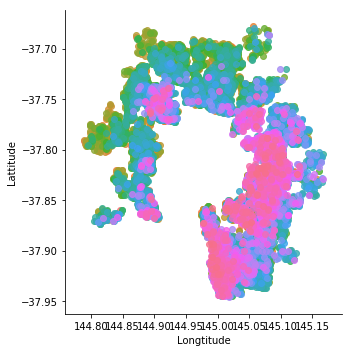

In [75]:
sub = train_m[(train_m['Distance']<14) & (train_m['Distance']>6)].dropna()
sbn.lmplot(x = 'Longtitude', y='Lattitude', data=sub.dropna(), hue='Price', fit_reg=False, legend=False)

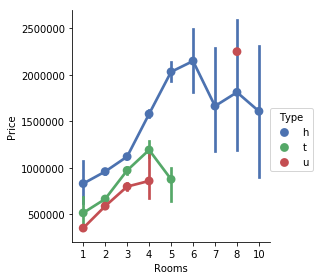

In [78]:
sbn.factorplot(x='Rooms',y='Price',hue='Type',data=sub, palette='deep')

In [97]:
sub['Suburb'].unique()[:10] # A few names of suitable Suburbs

array(['Pascoe Vale', 'Murrumbeena', 'Doncaster', 'Bundoora', 'Glenroy',
       'Brighton', 'Strathmore', 'Williamstown', 'Preston', 'Essendon'],
      dtype=object)

To support the argument, we see from the above graph there most of the expensive houses are 'h' with large no. rooms while smaller house which are generally more prefered by small families are available at lower rate and not too far from center of Melbourne where the office may situated.

<a id='ans3'></a>
[go back to top](#top)

### Question 3

Using feature selection and feature analysis, we found that the following strong features:
- *Type*
- *Regionname*
- *Method*
- *Rooms*, *Bedroom2*, *Bathroom* and *Car*
- *Distance*
- *Lattitude* and *Longtitude*

Proper visualisations on how we arrived at these conclusion can be found in the section [Relations between Features](#relation)

<a id='ans4'></a>

### Question 4

We used dimentionality reduction technique to reduce features like *Rooms*, *Bedroom2*, *Bathroom* and *Car* into one combined feature called *Rooms_eff*.

The Centre of Melbourne is the expensive part of the town. To support this argument with appropiate visualisation refer to section [Relations between Features](#relation)

### Question 5

In [91]:
a=  train_m.groupby('SellerG')['Price'].size()
a[a > 1000]

SellerG
Barry            1891
Buxton           1130
Jellis           2058
Nelson           2204
Ray              1269
hockingstuart    1701
Name: Price, dtype: int64

In [94]:
agent1 = train_m[train_m['SellerG']=='Barry']
agent1.describe().astype(int)

,Rooms,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,Lattitude,Longtitude,Propertycount,Price
count,1891,1891,1891,1466,1466,1446,1254,1473,1473,1891,1891
mean,3,14,3087,3,1,1,595,-37,144,7743,847367
std,0,5,100,0,0,0,384,0,0,5549,347205
min,1,1,3008,1,1,0,0,-38,144,121,222000
25%,3,11,3040,3,1,1,431,-37,144,3582,610000
50%,3,13,3072,3,2,2,602,-37,144,5629,760000
75%,4,16,3107,4,2,2,704,-37,145,10175,1000000
max,8,47,3910,9,8,10,4679,-37,145,21650,3700000


Agent *Barry* mostly sells 3-4 rooms mostly in the suitable suburb region (Distance: 11-16) as described in Question 2. Average price is 760000 with adequate landsize as that of most houses in train_m set.

In [98]:
agent2 = train_m[train_m['SellerG']=='Buxton']
agent2.describe().astype(int)

,Rooms,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,Lattitude,Longtitude,Propertycount,Price
count,1130,1130,1130,787,787,785,672,803,803,1130,1130
mean,3,13,3178,3,1,1,591,-37,145,6511,1229603
std,1,4,21,1,0,0,1099,0,0,3223,551967
min,1,1,3000,0,1,0,0,-38,144,768,240000
25%,3,11,3165,3,1,1,319,-37,145,3692,850750
50%,3,13,3186,3,2,2,583,-37,145,5678,1165000
75%,4,14,3192,4,2,2,683,-37,145,9758,1465375
max,16,38,3207,16,9,8,21715,-37,145,17496,5150000


In Similar fashion with agent *Barry*, agent *Buxton* also sells houses in the suitable suburb region.

In [99]:
agent3 = train_m[train_m['SellerG']=='Jellis']
agent3.describe().astype(int)

,Rooms,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,Lattitude,Longtitude,Propertycount,Price
count,2058,2058,2058,1572,1572,1535,1362,1580,1580,2057,2058
mean,2,7,3107,3,1,1,502,-37,145,7917,1345212
std,0,4,40,0,0,1,748,0,0,3706,734337
min,1,0,3000,0,0,0,0,-38,144,394,237000
25%,2,4,3070,2,1,1,166,-37,144,4973,830000
50%,3,7,3108,3,2,2,384,-37,145,7485,1250000
75%,4,10,3141,4,2,2,673,-37,145,10969,1669750
max,8,27,3207,8,7,9,15900,-37,145,21650,6600000


Unlike the previous two, agent *Jellis* sells houses much near the center with expensive houses even for small rooms. We may note them as unsuitable suburb region houses.

In [100]:
agent4 = train_m[train_m['SellerG']=='Nelson']
agent4.describe().astype(int)

,Rooms,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,Lattitude,Longtitude,Propertycount,Price
count,2204,2204,2204,1758,1758,1711,1553,1776,1776,2204,2204
mean,2,7,3055,2,1,1,429,-37,144,7575,1021794
std,0,3,29,0,0,0,554,0,0,4900,487970
min,1,1,3002,1,0,0,0,-37,144,389,170000
25%,2,5,3040,2,1,1,173,-37,144,3593,700000
50%,3,7,3055,3,1,1,347,-37,144,6244,919000
75%,3,9,3070,3,2,2,580,-37,144,11204,1252750
max,10,20,3752,6,5,8,8140,-37,145,21650,5600000


In Similar fashion with agent *Jellis*, agent *Nelson* also sells houses in the unsuitable suburb region. They both sell a lot of houses compared to rest of the sellers in train_m set

In [101]:
agent5 = train_m[train_m['SellerG']=='hockingstuart']
agent5.describe().astype(int)

,Rooms,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,Lattitude,Longtitude,Propertycount,Price
count,1701,1701,1701,1276,1276,1252,1125,1292,1292,1701,1701
mean,2,11,3127,2,1,1,555,-37,144,8560,938574
std,0,7,94,0,0,0,1422,0,0,4680,586803
min,1,0,3000,0,0,0,0,-38,144,394,185000
25%,2,6,3060,2,1,1,149,-37,144,5058,570000
50%,3,10,3141,3,1,2,406,-37,145,7630,775000
75%,3,13,3182,3,2,2,641,-37,145,11308,1190000
max,8,41,3977,9,7,8,17200,-37,145,21650,11200000


In Similar fashion with agent *Barry*, agent *hockingstuart* also sells houses in the suitable suburb region. We can see that those who sell a lot of houses are situated near the center of Melbourne. This argument is supported by the fact that most people want to stay close to their working place and be close to better medical, electrical, marketing facilities are avalable near the Centre.

<a  id='ref'></a>
[go back to top](#top)

## Refernce and resources used

- [Python Graph Gallery](https://python-graph-gallery.com/) for all the graph examples used.
- [Stackoverflow](https://stackoverflow.com/) for small queries that comes up always.
- kaggle kernel [Pytanic](https://www.kaggle.com/headsortails/pytanic) for most of the reference for [Data Analysis](#datanal) section.